## Phase 4 (Modeling): Multilayer Perceptron -- Parameterstudie

* Autorin: Anna (i3-Versicherung)
* Webseite: [Data Science Training - Kapitel 9](https://data-science.training/kapitel-9/)
* Datum: 23.03.2023

Version 5

In [4]:
# Pandas Paket (Package) importieren
#  Datenstrukturen und Datenanalyse, I/O
#  https://pandas.pydata.org/pandas-docs/stable/
import pandas as pd
# Pyplot Modul der Matplot Bibliothek (Library) importieren
#  Mathematische grafische Daten-Visualisierungen
#  https://matplotlib.org/contents.html
import matplotlib.pyplot as plt
# Klassen und Funktionen der scikit-learn Module importieren
#  Maschinelles Lernen, Algorithmen
#  https://scikit-learn.org/stable/modules/classes.html
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
# Pickle Paket (Package) importieren
#  Objekte serialisieren
#  https://docs.python.org/3/library/pickle.html
import pickle as pk
# Eigene Module importieren
#  zur Bewertung der Modelle
import sys
sys.path.append('../00_DST_Module/')
import dst_score_functions as sf
# Warnungen unterdrücken
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Datenversion festlegen: 5
version  = 5
# Modell-Abkürzung festlegen: mlp = Multilayer Perceptron
shortcut = 'mlp'
# Parameterstudie festlegen: 1 bis 5
attempt  = 5

In [6]:
# Trainingsdaten als Pandas Data Frame (df) aus Excel-Datei laden
#  (KNIME: "Excel Reader")
filename = '../../data/titanic/new/training_v' + str(version) + '.xlsx'
df_train = pd.read_excel(filename)

In [7]:
# Beschreibende Attribute extrahieren (ohne Survived)
X = df_train.iloc[:,1:].values
# Klassenattribut (Survived) extrahieren
y = df_train.iloc[:,0].values

In [8]:
# Input-Werte (X) auf Intervall [0, 1] skalieren
#  (KNIME: "Normalizer (PMML)")
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [9]:
# Stratifizierte k-fache Kreuzvalidierung (mit k=10)
#  (KNIME: "X-Partitioner")
skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

In [10]:
# Parameterstudien
#  Wir suchen Neuronale Netzwerke, die nicht komplex sind, um Overfitting zu vermeiden.
#  Hierzu werden verschiedene Parameter eingestellt.
#  Die Genauigkeit (Accuracy) dient dabei als Optimierungskriterium.
#
# Parameterstudie 1: 9 Kombinationen
#  Wir nehmen die Topologie MLP-15-8-4-2 sowie den Standard-Wert zu den max. Iterationen
#  Die Aktivierungsfunktion und der Solver werden variiert.
#
if attempt == 1:
    hidden_layer_sizes = [(8, 4)]                     # default = (100,)     1    (8, 4)
    activation         = ['logistic', 'tanh', 'relu'] # default = 'relu'     3    logistic, tanh,   relu
    solver             = ['lbfgs', 'sgd', 'adam']     # default = 'adam'     3    lbfgs,    sgd,    adam
    max_iter           = [200]                        # default = 200        1    200
#
# Parameterstudie 2: 1008 Kombinationen
#  Wir benutzen nur eine verborgene Schicht und schränken die Anzahl der verborgenen Neuronen ein.
#  Auch die Anzahl der maximalen Iterationen wird ebenfalls nach unten angepasst.
#
elif attempt == 2:    
    hidden_layer_sizes = range(2, 16)                 # default = (100,)     14   2, 3, 4, ..., 15 
    activation         = ['logistic', 'tanh', 'relu'] # default = 'relu'     3    logistic, tanh,   relu
    solver             = ['lbfgs', 'sgd', 'adam']     # default = 'adam'     3    lbfgs,    sgd,    adam
    max_iter           = range(25, 201, 25)           # default = 200        8    25, 50, 75, ..., 200
#
# Ergebnis: 8 hidden neurons, logistic, lbfgs, max. 50 iterations
#
# Parameterstudie 3: 100 Kombinationen
#  Ausgangspunkt ist das Ergebnis des ersten Versuchs.
#  Wir benutzen die logistische Aktivierungsfunktion und den Solver lbfgs.
#  Wir versuchen, das neuronale Netzwerk zu verkleinern.
#
elif attempt == 3:
    hidden_layer_sizes = range(3, 8)                  # 5    3, 4, 5, 6, 7
    activation         = ['logistic']
    solver             = ['lbfgs']
    max_iter           = range(5, 105, 5)             # 20   5, 10, ..., 100
#
# Ergebnis: 3 hidden neurons, max. 35 iterations
#
# Parameterstudie 4: 35 Kombinationen
#  Ausgangspunkt ist nun der zweite Versuch.
#  Wir belassen es bei den 3 hidden neurons.
#  Wir versuchen nun die max. iterations zu reduzieren.
#
elif attempt == 4:    
    hidden_layer_sizes = [3] 
    activation         = ['logistic']
    solver             = ['lbfgs']
    max_iter           = range(1, 35)                 # 35   1, 2, 3, ..., 34
#
# Ergebnis: 3 hidden neurons, max. 80 iterations
#
# "Parameterstudie 5": 1 Kombination
#   Ausgangspunkt ist der dritte Versuch.
#   Hier haben wir festgestellt, dass bei max. 25 iterations die Genauigkeit
#   bei knapp 83 Prozent liegt (0.8294). Dieser Wert scheint gut genug zu sein.
else:
    hidden_layer_sizes = [3] 
    activation         = ['logistic']
    solver             = ['lbfgs']
    max_iter           = [25]

In [11]:
# Brute Force Methode
#  Initialisierung
n = 0
best_parameters = None
max_acc = 0
for act in activation:
    print(act, ' ', end='')
    for sol in solver:
        print(sol, ' ', end='')
        for mit in max_iter:
            print(mit, ' ', end='')
            for hls in hidden_layer_sizes:
                n = n + 1
                print('.', end='')
                # Modell mit Parameter initialisieren
                model = MLPClassifier(hidden_layer_sizes=hls, activation=act, solver=sol, max_iter=mit, random_state=0)
                # Ergebnisse berechnen
                acc = 100.0 * cross_val_score(model, X, y, cv=skf).mean()
                if acc > max_acc:
                    max_acc = acc
                    best_parameters = model.get_params()
                    print(' %8.4f ' % acc, end='')
print()
print('Ergebnis')
print(' Anzahl Parameterkombinationen:', n)
print(' Maximale Genauigkeit:', max_acc)
print(' Parameter des besten Modells:')
print(best_parameters)

logistic  lbfgs  25  .  82.9376 
Ergebnis
 Anzahl Parameterkombinationen: 1
 Maximale Genauigkeit: 82.93757802746568
 Parameter des besten Modells:
{'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 25, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [12]:
# Multilayer Perceptron Methode auswählen
#  (KNIME: "RProp MLP Learner")
model = MLPClassifier()
model.set_params(**best_parameters)
print(model.get_params())

{'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 25, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [13]:
# Ergebnisse berechnen und ausgeben
#  (KNIME: "XYZ Learner", "XYZ Predictor", "X-Aggregator", "Scorer")
scores = sf.dst_scores(model, X, y, cv=skf)
sf.dst_print_scores(scores)


Confusion Matrix

* TN (True  Negatives) : 505
* TP (True  Positives) : 234
* FN (False Negatives) : 108
* FP (False Positives) : 44

Gütemaße

* Genauigkeit  (Accuracy)    :   82,94 %
* Spezifität   (Specificity) :   91,98 %
* Sensitivität (Sensitivity) :   68,40 %
* Präzision    (Precision)   :   84,22 %
* Recall       (Recall)      :   68,40 %
* F-Maß        (F Score)     :   75,32 %
* AURC         (AURC)        :   87,11 %
* LogLoss      (LogLoss)     :    0,415

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  82,40 %


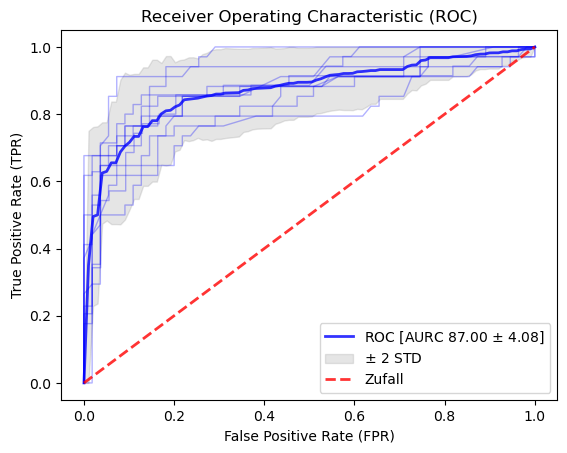

In [14]:
# Receiver Operating Characteristic (ROC) zeichnen
#  (KNIME: "ROC Curve")
sf.dst_roc(model, X, y, cv=skf)

In [15]:
# Modell mit allen Daten trainieren
#  (KNIME: "XYZ Learner")
model.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=3, max_iter=25,
              random_state=0, solver='lbfgs')

In [16]:
# Trainiertes Modell speichern
#  (KNIME: "PMML Writer")
filename = '../../models/titanic/new/' + shortcut + '_v' + str(version) + '_opt_' + str(attempt)
pk.dump(model, open(filename, 'wb'))

In [17]:
# Scaler speichern
#  (KNIME: "PMML Writer")
filename += '_scaler'
pk.dump(scaler, open(filename, 'wb'))

## Ergebnisse

#### Daten Version 5 (Float) MinMaxScaler

#### Parameterstudie 1

Parameter

MLPClassifier(hidden_layer_sizes=(8, 4), random_state=0, solver='lbfgs')

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (8, 4), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}

Confusion Matrix

* TN (True  Negatives) : 502
* TP (True  Positives) : 230
* FN (False Negatives) : 112
* FP (False Positives) : 47

Gütemaße

* Genauigkeit  (Accuracy)    :   82,15 %
* Spezifität   (Specificity) :   91,44 %
* Sensitivität (Sensitivity) :   67,26 %
* Präzision    (Precision)   :   83,00 %
* Recall       (Recall)      :   67,26 %
* F-Maß        (F Score)     :   74,08 %
* AURC         (AURC)        :   85,55 %
* LogLoss      (LogLoss)     :    0,508

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  81,20 %

##### Andere Hardware #####

Confusion Matrix

* TN (True  Negatives) : 502
* TP (True  Positives) : 231
* FN (False Negatives) : 111
* FP (False Positives) : 47

Gütemaße

* Genauigkeit  (Accuracy)    :   82,26 %
* Spezifität   (Specificity) :   91,44 %
* Sensitivität (Sensitivity) :   67,55 %
* Präzision    (Precision)   :   83,05 %
* Recall       (Recall)      :   67,55 %
* F-Maß        (F Score)     :   74,27 %
* AURC         (AURC)        :   85,59 %
* LogLoss      (LogLoss)     :    0,507

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  81,29 %



#### Parameterstudie 2

Parameter

MLPClassifier(activation='logistic', hidden_layer_sizes=(8,), max_iter=50,
              random_state=0, solver='lbfgs')

{'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 8, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 50, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
              
Confusion Matrix

* TN (True  Negatives) : 512
* TP (True  Positives) : 234
* FN (False Negatives) : 108
* FP (False Positives) : 37

Gütemaße

* Genauigkeit  (Accuracy)    :   83,73 %
* Spezifität   (Specificity) :   93,26 %
* Sensitivität (Sensitivity) :   68,40 %
* Präzision    (Precision)   :   86,33 %
* Recall       (Recall)      :   68,40 %
* F-Maß        (F Score)     :   76,10 %
* AURC         (AURC)        :   86,64 %
* LogLoss      (LogLoss)     :    0,430

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  83,20 %

#### Parameterstudie 3

Parameter

MLPClassifier(activation='logistic', hidden_layer_sizes=(3,), max_iter=35,
              random_state=0, solver='lbfgs')
              
{'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 35, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}

Confusion Matrix

* TN (True  Negatives) : 516
* TP (True  Positives) : 233
* FN (False Negatives) : 109
* FP (False Positives) : 33

Gütemaße

* Genauigkeit  (Accuracy)    :   84,06 %
* Spezifität   (Specificity) :   93,99 %
* Sensitivität (Sensitivity) :   68,13 %
* Präzision    (Precision)   :   87,51 %
* Recall       (Recall)      :   68,13 %
* F-Maß        (F Score)     :   76,48 %
* AURC         (AURC)        :   87,16 %
* LogLoss      (LogLoss)     :    0,419

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  83,80 %

#### Parameterstudie 4

Parameter

MLPClassifier(activation='logistic', hidden_layer_sizes=(3,), max_iter=33,
              random_state=0, solver='lbfgs')
              
{'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 33, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}

Confusion Matrix

* TN (True  Negatives) : 515
* TP (True  Positives) : 233
* FN (False Negatives) : 109
* FP (False Positives) : 34

Gütemaße

* Genauigkeit  (Accuracy)    :   83,95 %
* Spezifität   (Specificity) :   93,81 %
* Sensitivität (Sensitivity) :   68,13 %
* Präzision    (Precision)   :   87,27 %
* Recall       (Recall)      :   68,13 %
* F-Maß        (F Score)     :   76,39 %
* AURC         (AURC)        :   87,16 %
* LogLoss      (LogLoss)     :    0,418

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  83,69 %

#### Parameterstudie 5

Parameter

MLPClassifier(activation='logistic', hidden_layer_sizes=(3,), max_iter=25,
              random_state=0, solver='lbfgs')
              
{'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 25, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}   

Confusion Matrix

* TN (True  Negatives) : 505
* TP (True  Positives) : 234
* FN (False Negatives) : 108
* FP (False Positives) : 44

Gütemaße

* Genauigkeit  (Accuracy)    :   82,94 %
* Spezifität   (Specificity) :   91,98 %
* Sensitivität (Sensitivity) :   68,40 %
* Präzision    (Precision)   :   84,22 %
* Recall       (Recall)      :   68,40 %
* F-Maß        (F Score)     :   75,32 %
* AURC         (AURC)        :   87,11 %
* LogLoss      (LogLoss)     :    0,415

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  82,40 %